In [1]:
import pandas as pd
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as dt

In [14]:
precos = pd.DataFrame()

stocks = ["ABEV3.SA" , "ASAI3.SA" , "AZUL4.SA" , "B3SA3.SA" , "BBAS3.SA" , "BBDC3.SA",  "BBDC4.SA" , "BBSE3.SA" , "BEEF3.SA", 
"BPAC11.SA", "BRAP4.SA" , "BRDT3.SA" , "BRFS3.SA" , "BRKM5.SA" , "BRML3.SA" , "AMER3.SA" , "CCRO3.SA" , "CIEL3.SA" ,
"CMIG4.SA"  ,"COGN3.SA" , "CPFE3.SA" , "CPLE6.SA" , "CRFB3.SA" , "CSAN3.SA" , "CSNA3.SA" , "CVCB3.SA" , "CYRE3.SA" ,
"ECOR3.SA"  ,"EGIE3.SA" , "ELET3.SA" , "ELET6.SA" , "EMBR3.SA" , "ENBR3.SA" , "ENEV3.SA" , "ENGI11.SA", "EQTL3.SA" ,
"EZTC3.SA"  ,"FLRY3.SA" , "GGBR4.SA" , "GNDI3.SA" , "GOAU4.SA" , "GOLL4.SA" , "HAPV3.SA" , "HGTX3.SA" , "HYPE3.SA" ,
"IGTA3.SA"  ,"IRBR3.SA" , "ITSA4.SA" , "ITUB4.SA" , "JBSS3.SA" , "JHSF3.SA" , "KLBN11.SA", "LAME4.SA" , "LCAM3.SA" ,
"LREN3.SA"  ,"MGLU3.SA" , "MRFG3.SA" , "MRVE3.SA" , "MULT3.SA" , "NTCO3.SA" , "PCAR3.SA" , "PETR3.SA" , "PETR4.SA" ,
"PRIO3.SA"  ,"QUAL3.SA" , "RADL3.SA" , "RAIL3.SA" , "RENT3.SA" , "SANB11.SA", "SBSP3.SA" , "SULA11.SA", "SUZB3.SA" ,
"TAEE11.SA" ,"TIMS3.SA" , "TOTS3.SA" , "UGPA3.SA" , "USIM5.SA" , "VALE3.SA" , "VIVT3.SA" , "VIIA3.SA" , "WEGE3.SA" ,
"YDUQ3.SA"]

for i in stocks:
    precos[i] = dt.DataReader(i, data_source = 'yahoo', start = '2018-01-01')['Close']
    
precos.dropna(inplace=True)

rets = precos.pct_change()

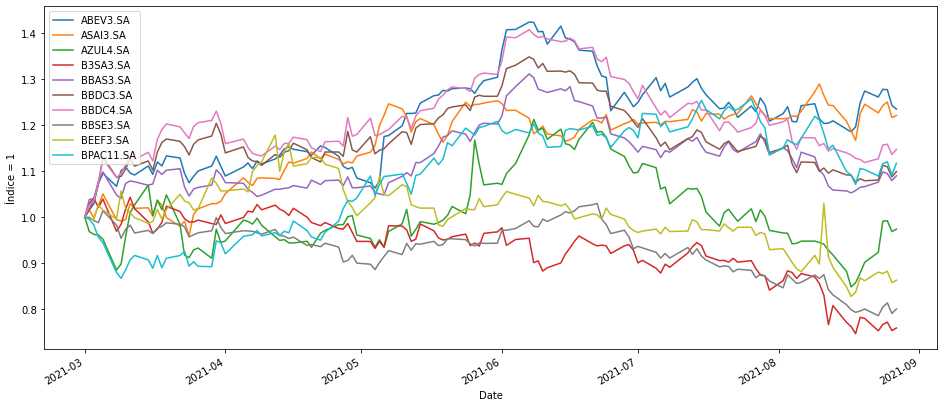

In [15]:
(precos.loc[precos.index.sort_values()]/precos.loc[precos.index.sort_values()].iloc[0]).plot(figsize=(16,7))
plt.ylabel("Índice = 1");

In [16]:
rf = (1 + 0.0575)**(1/252)-1

In [17]:
corr_mat = rets.corr()
corr_mat

,ABEV3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BPAC11.SA
ABEV3.SA,1.000000,0.315679,0.368089,0.270923,0.528997,0.483936,0.487591,0.476327,0.170648,0.300417
ASAI3.SA,0.315679,1.000000,0.266982,0.428619,0.263901,0.327728,0.291067,0.362554,0.213748,0.447101
AZUL4.SA,0.368089,0.266982,1.000000,0.279860,0.463901,0.470370,0.443071,0.413553,0.087200,0.389082
B3SA3.SA,0.270923,0.428619,0.279860,1.000000,0.372803,0.414031,0.360938,0.426438,0.164216,0.485469
BBAS3.SA,0.528997,0.263901,0.463901,0.372803,1.000000,0.749418,0.750459,0.471823,0.163452,0.383349
BBDC3.SA,0.483936,0.327728,0.470370,0.414031,0.749418,1.000000,0.954900,0.515975,0.181299,0.463528
BBDC4.SA,0.487591,0.291067,0.443071,0.360938,0.750459,0.954900,1.000000,0.469393,0.182275,0.394120
BBSE3.SA,0.476327,0.362554,0.413553,0.426438,0.471823,0.515975,0.469393,1.000000,0.256430,0.430224
BEEF3.SA,0.170648,0.213748,0.087200,0.164216,0.163452,0.181299,0.182275,0.256430,1.000000,0.129744
BPAC11.SA,0.300417,0.447101,0.389082,0.485469,0.383349,0.463528,0.394120,0.430224,0.129744,1.000000


In [18]:
mean_rets = rets.mean()
mean_rets

ABEV3.SA     0.001862
ASAI3.SA     0.001735
AZUL4.SA     0.000198
B3SA3.SA    -0.001973
BBAS3.SA     0.000800
BBDC3.SA     0.000893
BBDC4.SA     0.001244
BBSE3.SA    -0.001675
BEEF3.SA    -0.000822
BPAC11.SA    0.001102
dtype: float64

In [19]:
rets_vector = np.linspace(min(mean_rets), max(mean_rets),2000)
rets_vector

array([-0.00197324, -0.00197132, -0.0019694 , ...,  0.00185779,
        0.00185971,  0.00186162])

In [20]:
def volatility(pesos):
    pesos = np.array(pesos)
    covar = np.array(rets.cov())
    vol = np.dot(pesos.T, np.dot(covar,pesos))
    return np.sqrt(vol)

In [21]:
def returns(pesos):
    return np.dot(np.array(pesos), np.array(mean_rets)).sum()

In [22]:
def checksum(pesos):
    return np.sum(pesos)-1

In [23]:
chute = [0.00025 for i in range(82)]

In [24]:
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),
          (0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),
          (0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),
          (0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),
          (0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),
          (0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),
          (0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),
          (0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1), (0,1),(0,1))

In [25]:
fronteira = []
fronteira_pesos = []
for retorno_possivel in rets_vector:
    cons = ({"type":"eq","fun":checksum},
           {"type":"eq","fun":lambda n:returns(n)-retorno_possivel})
    resultado = opt.minimize(volatility,chute,method = "SLSQP",bounds = bounds, constraints=cons)
    fronteira.append(resultado["fun"])
    fronteira_pesos.append(resultado["x"])

In [26]:
min_var = min(fronteira)
retorno_min_var = rets_vector[fronteira.index(min(fronteira))]

In [28]:
ret = []
vol=[]
for i in range(2000000):
    weights = np.random.rand(82)
    weights /= weights.sum()
    vol.append(volatility(weights))
    ret.append(returns(weights))

In [29]:
sharpe_fronteira = (rets_vector-rf)/fronteira

In [30]:
sharpe_max_vol = fronteira[np.argmax(sharpe_fronteira)]
sharpe_max_retorno = rets_vector[np.argmax(sharpe_fronteira)]

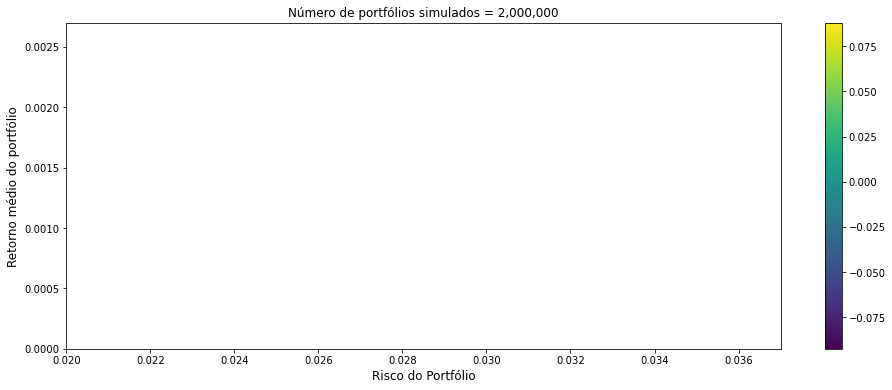

In [31]:
sharpe = (np.array(ret)-rf)/np.array(vol)
plt.figure(figsize=(16,6))
plt.scatter(vol,ret,c=sharpe,cmap="viridis")
plt.xlabel("Risco do Portfólio",fontsize=12)
plt.ylabel("Retorno médio do portfólio",fontsize=12)
plt.title("Número de portfólios simulados = 2,000,000")
plt.axis([0.02,0.037,0,0.0027])
colorbar=plt.colorbar()
colorbar.ax.set_label("Sharpe")
plt.show()

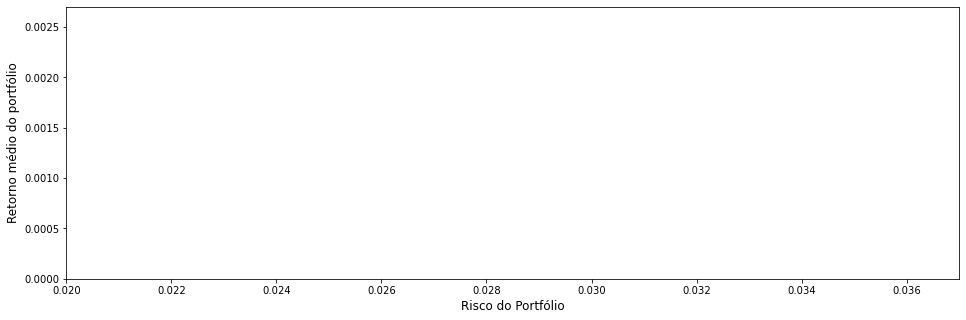

In [32]:
plt.figure(figsize=(16,5))
plt.plot(fronteira,rets_vector)
plt.xlabel("Risco do Portfólio",fontsize=12)
plt.ylabel("Retorno médio do portfólio",fontsize=12)
plt.axis([0.02,0.037,0,0.0027])
plt.show()

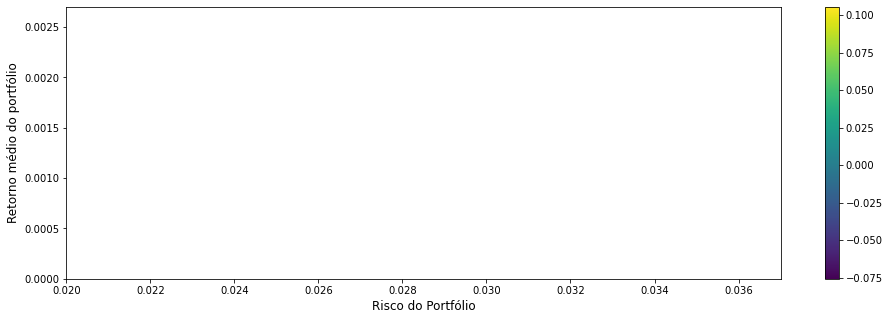

In [33]:
sharpe = (np.array(ret))/np.array(vol)
plt.figure(figsize=(16,5))
plt.scatter(vol,ret,c=sharpe,cmap="viridis")
plt.plot(fronteira,rets_vector,label="Fronteira por otimização")
plt.xlabel("Risco do Portfólio",fontsize=12)
plt.ylabel("Retorno médio do portfólio",fontsize=12)
plt.axis([0.02,0.037,0,0.0027])
plt.colorbar()
plt.show()

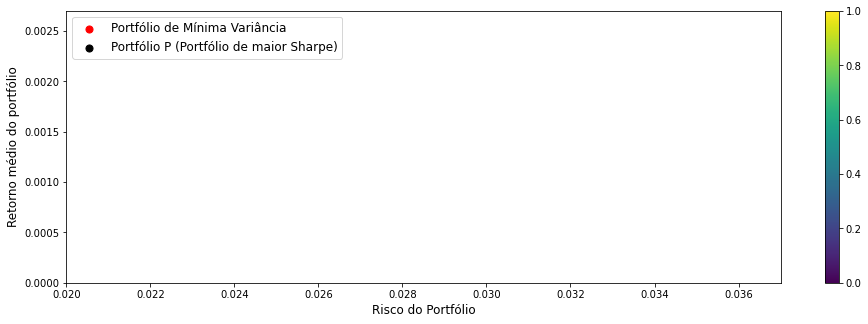

In [34]:
sharpe = (np.array(ret)-rf)/np.array(vol)
plt.figure(figsize=(16,5))
plt.scatter(vol,ret,c=sharpe,cmap="viridis")
plt.scatter(min_var,retorno_min_var,label="Portfólio de Mínima Variância",c="red",s=50,zorder=2)
plt.scatter(sharpe_max_vol,sharpe_max_retorno,label="Portfólio P (Portfólio de maior Sharpe)",c="black",s=50,zorder=2)
plt.plot(fronteira,rets_vector,zorder=1)
plt.xlabel("Risco do Portfólio",fontsize=12)
plt.ylabel("Retorno médio do portfólio",fontsize=12)
plt.axis([0.02,0.037,0,0.0027])
plt.legend(loc="upper left",fontsize=12)
plt.colorbar()
plt.show()

In [56]:
inclinacao_lac = (sharpe_max_retorno-rf)/sharpe_max_vol

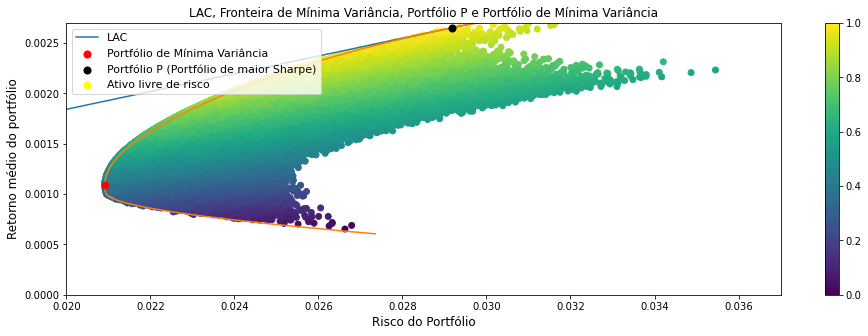

In [58]:
sharpe = (np.array(ret)-rf)/np.array(vol)
plt.figure(figsize=(16,5))
plt.scatter(vol,ret,c=sharpe,cmap="viridis")
plt.scatter(min_var,retorno_min_var,label="Portfólio de Mínima Variância",c="red",s=50,zorder=2)
plt.scatter(sharpe_max_vol,sharpe_max_retorno,label="Portfólio P (Portfólio de maior Sharpe)",c="black",s=50,zorder=2)
plt.scatter(0,rf,label="Ativo livre de risco",c="yellow",s=50,zorder=2)
plt.plot(np.array([0,0.01,0.02,0.03]),np.array([0,0.01,0.02,0.03])*inclinacao_lac+rf,label="LAC",zorder=1)
plt.plot(fronteira,rets_vector,zorder=1)
plt.xlabel("Risco do Portfólio",fontsize=12)
plt.ylabel("Retorno médio do portfólio",fontsize=12)
plt.axis([0.02,0.037,0,0.0027])
plt.legend(loc="upper left",fontsize=11)
plt.title("LAC, Fronteira de Mínima Variância, Portfólio P e Portfólio de Mínima Variância")
plt.colorbar()
plt.show()